In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck18')

import matplotlib 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'
matplotlib.rcParams['font.size'] = 16

from matplotlib import interactive
interactive(True)

In [8]:
h = 0.6766

## Infalling Profiles Analysis
DIfferent Infalling profiles  and how they are affected when their parameters are varied.

In [2]:
from colossus.halo import profile_outer

## OuterTermMeanDensity Profile 

An outer term that adds the mean matter density of the universe to a density profile.

This is perhaps the simplest outer term one can imagine. The only parameter is the redshift at which the halo density profile is modeled. Note that this term is cosmology-dependent, meaning that a cosmology has to be set before the constructor is called.

Furthermore, note that a constant term such as this one means that the surface density cannot be evaluated any more, since the integral over density will diverge. If the surface density is to be evaluated, one should always remove constant outer terms from the profile. This class does overwrite the surface density function and issues a warning if it is called.

In this implementation, the redshift is added to the profile options rather than parameters, meaning that it cannot be varied in a fit.

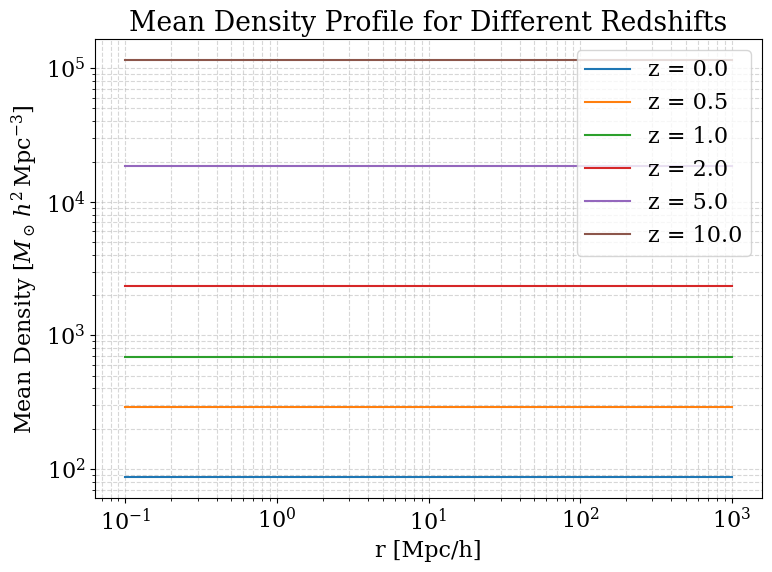

In [3]:
# Define the radius array
r = np.logspace(-1, 3, 100)  # 0.1 to 1000 Mpc/h

# Define redshift values (sample a few to avoid overcrowding the plot)
z_vals = [0.0, 0.5, 1.0, 2.0, 5.0, 10.0]

# Plotting
plt.figure(figsize=(8, 6))
for z in z_vals:
    profile = profile_outer.OuterTermMeanDensity(z=z)
    density = profile.density(r)
    plt.plot(r, density, label=f'z = {z:.1f}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('r [Mpc/h]')
plt.ylabel(r'Mean Density [$M_\odot\,h^2\,\mathrm{Mpc}^{-3}$]')
plt.title('Mean Density Profile for Different Redshifts')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

## OuterTermInfalling Profile (Diemer 2023)

This class implements a **power-law outer profile** with a free normalization and slope, a fixed or variable pivot radius, and a smooth transition to a maximum value at small radii:

$$
\rho(r) = \delta_1 \rho_{\rm m}(z) \left[ \left( \frac{\delta_1}{\delta_{\rm max}} \right)^{1/\zeta} + \left( \frac{r}{r_{\rm pivot}} \right)^{s/\zeta} \right]^{-\zeta}
$$

Where:

- $\delta_1$ is the normalization in units of the mean density of the universe.
- $s$ is the slope.
- $\delta_{\max}$ is the maximum overdensity at the center of the halo.
- $\zeta$ determine how rapidly the profile transitions to this density.

> Note that a more positive slope means a steeper profile.  
> By default, $\zeta = 0.5$.  
> In the formulation of Diemer 2023, the pivot radius is $R_{200m}$.  
> Other radii can be chosen, but then the profile is not automatically kept up to date if the parameters of the inner profile change.

---

### **Parameters**

#### `pl_delta_1 : float`
The normalization of the infalling profile at the pivot radius (R200m by default) in units of the mean matter density of the universe.

#### `pl_s : float`
The (negative) slope of the power-law profile.

#### `pl_zeta : float`
The smoothness of the transition to the asymptotic value at the halo center.

#### `pl_delta_max : float`
The asymptotic overdensity at the center of the halo, in units of the mean matter density of the universe.

#### `pivot : str`
There are fundamentally two ways to set the pivot radius.

- If `pivot='fixed'`, `pivot_factor` gives the pivot radius in physical kpc/h.
- Otherwise, `pivot` must indicate the name of a profile parameter or option.

In this case, the pivot radius is set to `pivot_factor` times the parameter or option in question.  
For example, for profiles based on a scale radius, a pivot radius of 2*r_s can be set by passing `pivot='rs'` and `pivot_factor=2.0`.  
However, only setting the pivot to `"R200m"` ensures that the profile is kept consistent.

> When fitting, a fixed pivot radius is recommended because even R200m is not updated with every iteration in a fit, leading to inconsistencies.

#### `pivot_factor : float`
See above.

#### `z : float`
Redshift.



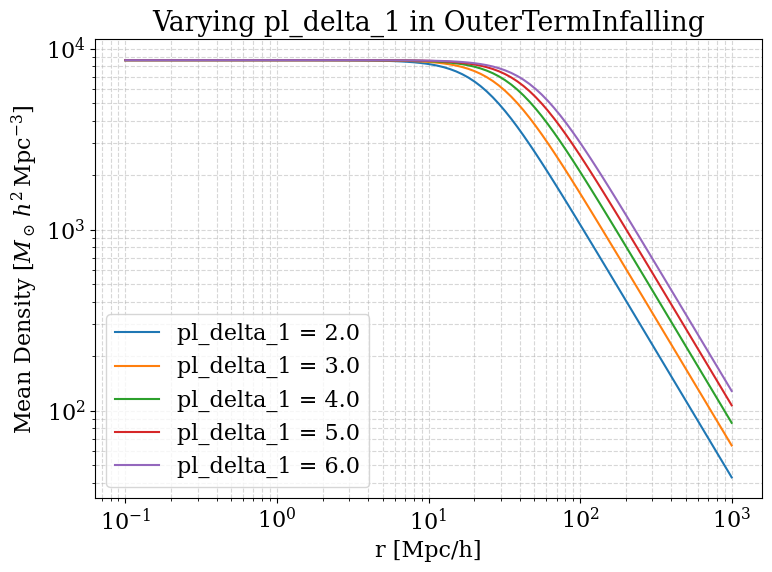

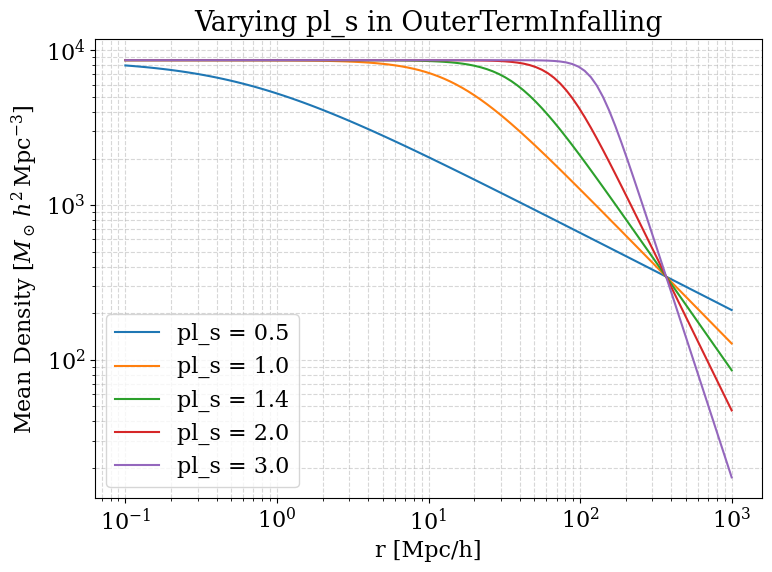

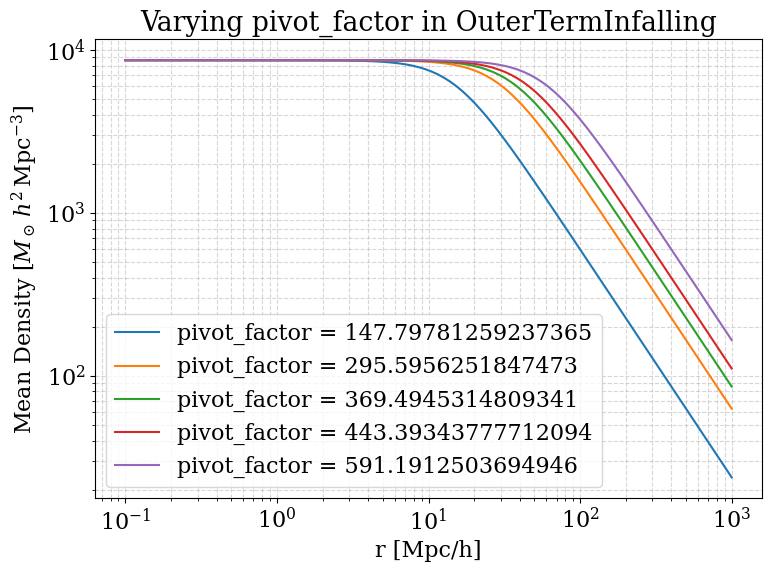

In [12]:
r = np.logspace(-1, 3, 100)  # 0.1 to 1000 Mpc/h

# Fixed parameters
fixed_pl_delta_1 = 4.0
fixed_pl_s = 1.4
fixed_pivot_factor = 250 / h
z = 0.0

def plot_density_variation(param_name, values):
    plt.figure(figsize=(8, 6))
    
    for val in values:
        # Set parameter values
        kwargs = {
            "pl_delta_1": fixed_pl_delta_1,
            "pl_s": fixed_pl_s,
            "pivot": "fixed",
            "pivot_factor": fixed_pivot_factor,
            "z": z
        }
        kwargs[param_name] = val  # Vary the parameter
        
        # Create profile and compute density
        profile = profile_outer.OuterTermInfalling(**kwargs)
        density = profile.density(r)
        
        # Plot
        plt.plot(r, density, label=f'{param_name} = {val}')
    
    # Plot settings
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('r [Mpc/h]')
    plt.ylabel(r'Mean Density [$M_\odot\,h^2\,\mathrm{Mpc}^{-3}$]')
    plt.title(f'Varying {param_name} in OuterTermInfalling')
    plt.legend()
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Vary pl_delta_1
plot_density_variation('pl_delta_1', [2.0, 3.0, 4.0, 5.0, 6.0])

# Vary pl_s
plot_density_variation('pl_s', [0.5, 1.0, 1.4, 2.0, 3.0])

# Vary pivot_factor
plot_density_variation('pivot_factor', [100/h, 200/h, 250/h, 300/h, 400/h])

